<a href="https://colab.research.google.com/github/icamerlinckx/python_projects/blob/master/Transferencias_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
file_path = '/content/Transferencias entre Farmacias - 2024.xlsx'
nombre_hoja = 'Transferencias entre 97-98-99 '
df = pd.read_excel(file_path, sheet_name=nombre_hoja)
df.head()

,Botiquin Origen,Botiquin Destino,Dia - Movimiento Bot,Far Operacion Agrupador,MEDICAMENTO FARMACIA,desc,Far Numero,Cantidad (sin signo)
0,97,98,2024-04-03,Transferencia,10704008,ACCU-CHECK GUIDE TIRAS,6774125,50
1,97,98,2024-04-03,Transferencia,14004001,FISIOLOGICA X 10 ML BRAUN AMP,6774128,10
2,97,98,2024-04-03,Transferencia,76000514,GUANTE HIPOALERG.ESTERIL 7 1/2 PAR,6774128,50
3,97,98,2024-04-03,Transferencia,77000302,MICROPORE 5 X 9.1,6774128,18
4,97,98,2024-04-03,Transferencia,77000303,TRANSPORE X 5 CM,6774128,6


In [41]:
df.columns = ['botorigen', 'botdestino', 'fecha','opera','codigo','descripcion','farn','cantidad']

In [45]:
df_sub = df[(df['botorigen'] == 98) & (df['botdestino'] == 99)]
df_sub = df_sub[['fecha','codigo','descripcion','cantidad']]
df_sub['mes'] = df_sub['fecha'].dt.month
df_sub['semana'] = df_sub['fecha'].dt.isocalendar().week
df_sub.head()

,fecha,codigo,descripcion,cantidad,mes,semana
1779,2024-01-01,10034504,SYSTANE ULTRA GOTAS X 10 ML,1,1,1
1780,2024-01-01,10060129,DERMAGLOS EMULSION X 400 ML,10,1,1
1781,2024-01-01,10714103,ACI-TIP SOL.X 200 ML,1,1,1
1782,2024-01-01,10756708,ACTRON PEDIATRICO 2% SUSP X 100 ML,1,1,1
1783,2024-01-02,10700803,COBENEXOL FUERTE COMP X 30,30,1,1


In [48]:
df_agrupado = df_sub.groupby('semana').agg(
    unidades=('cantidad', 'sum'),
    transferencias=('cantidad', 'count')
)
df_agrupado.head()

,unidades,transferencias
semana,,
1,6151,85
2,6666,104
3,6833,86
4,5631,118
5,5653,124


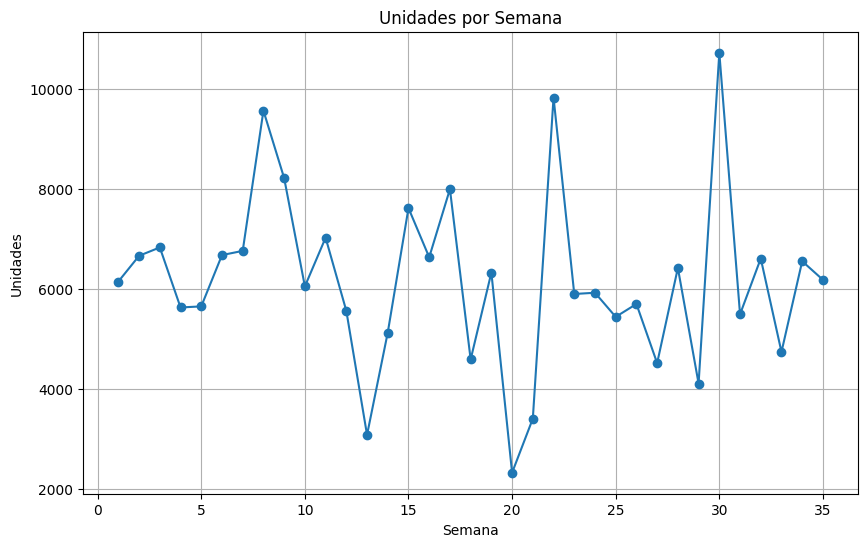

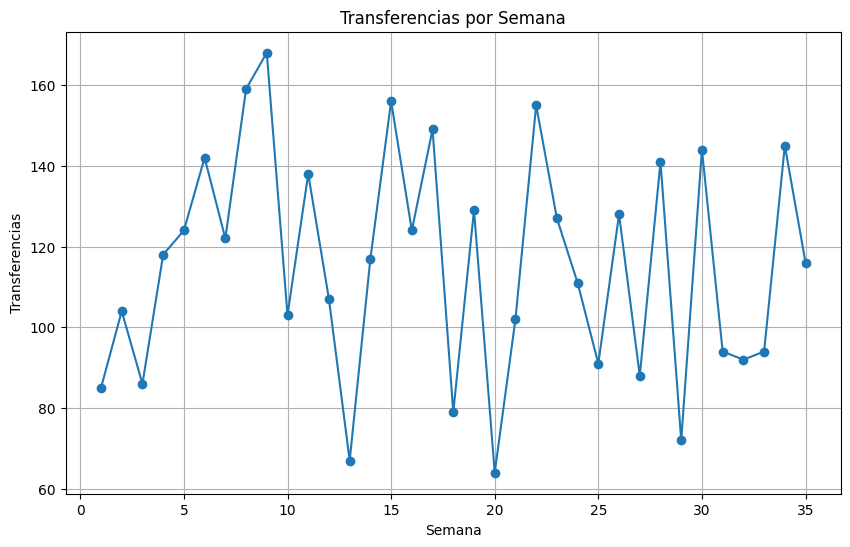

In [47]:
import matplotlib.pyplot as plt

# Gráfico de unidades por semana
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
plt.plot(df_agrupado.index, df_agrupado['unidades'], marker='o', linestyle='-')
plt.title('Unidades por Semana')
plt.xlabel('Semana')
plt.ylabel('Unidades')
plt.grid(True)
plt.show()

# Gráfico de transferencias por semana
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
plt.plot(df_agrupado.index, df_agrupado['transferencias'], marker='o', linestyle='-')
plt.title('Transferencias por Semana')
plt.xlabel('Semana')
plt.ylabel('Transferencias')
plt.grid(True)
plt.show()

###1. Top 10 productos con más transferencias:
- Agrupamos df_sub por 'descripcion' y sumamos la 'cantidad' para cada producto.
- Ordenamos los resultados en orden descendente según la suma de 'cantidad'.
- Usamos head(10) para obtener los 10 productos con más transferencias.

In [49]:
top_10_transferencias = df_sub.groupby('descripcion')['cantidad'].sum().sort_values(ascending=False).head(10)
print(top_10_transferencias)

descripcion
GENIOL 1 GR COMP X 56                 18078
PROCELAC 40 MG COMP X 28               3646
AMLOC  5 MG COMP X 30                  2670
ACCU-CHECK GUIDE TIRAS X 50            2350
ASPIRINA PREVENT COMP X 50             2250
ACCU-CHECK SOFTCLIX LANCETAS X 200     1600
PROCELAC  20 MGCOMP X 28               1568
CLONAGIN 1 MG COMP X 60                1440
AMLOC 10 MG COMP X 30                  1410
BLOKIUM GESIC COMP X 30                1410
Name: cantidad, dtype: int64


###2. Top 10 productos que más crecieron en transferencias:
- Agrupamos por 'descripcion' y 'semana' para calcular las transferencias de cada producto en cada semana.
- Pivoteamos la tabla para facilitar el cálculo del crecimiento.
- Calculamos el crecimiento restando las transferencias de la primera semana a las de la última.
- Ordenamos por crecimiento y obtenemos el top 10.

In [50]:
# Calculamos las transferencias por producto y semana
transferencias_por_semana = df_sub.groupby(['descripcion', 'semana'])['cantidad'].sum().reset_index()

# Pivoteamos la tabla para tener las semanas como columnas
transferencias_por_semana_pivot = transferencias_por_semana.pivot(index='descripcion', columns='semana', values='cantidad').fillna(0)

# Calculamos el crecimiento entre la última semana y la primera
primera_semana = transferencias_por_semana_pivot.columns[0]
ultima_semana = transferencias_por_semana_pivot.columns[-1]
crecimiento = transferencias_por_semana_pivot[ultima_semana] - transferencias_por_semana_pivot[primera_semana]

# Ordenamos por crecimiento y obtenemos el top 10
top_10_crecimiento = crecimiento.sort_values(ascending=False).head(10)
print(top_10_crecimiento)

descripcion
BEROCCA PLUS COMP EF X 30     390.0
BIL 13 COMP X 100             200.0
PRAZODEX 20 MG COMP X 28      196.0
FOSEVA 800 MG TAB X 180       180.0
BACLOX 10 MG COMP X 60        160.0
SARMEC 20 MG COMP X 30        150.0
ERROLON COMP X 50             150.0
OXA 75 COMP X 30              120.0
BEROCCA PLUS COMP LAQ X 30    120.0
BIL 13 COMP X  40             120.0
dtype: float64


###3. Top 10 productos que más bajaron en transferencias:
- Usamos la misma variable 'crecimiento' del paso anterior.
- Ordenamos por crecimiento en orden ascendente para obtener los productos con mayor decrecimiento.
- Obtenemos el top 10.

In [51]:
# Usamos el mismo 'crecimiento' calculado en el paso anterior
top_10_bajaron = crecimiento.sort_values(ascending=True).head(10)
print(top_10_bajaron)

descripcion
ACCU-CHECK GUIDE TIRAS X 50          -2100.0
ACCU-CHECK SOFTCLIX LANCETAS X 200    -400.0
GENIOL 1 GR COMP X 56                 -392.0
PARACETAMOL RAFFO 500 COMP X 20       -360.0
PROCELAC 40 MG COMP X 28              -258.0
SOMIT CR 12.5 MG COMP X 30            -150.0
POVIRAL 800 MG COMP X 40              -120.0
LYRICA  75 MG CAPS X 30               -120.0
TAXAGON AD 100 MG COMP X 20           -100.0
BLOKIUM GESIC COMP X 30                -90.0
dtype: float64


###4. Tendencia de transferencias (media móvil 4 semanas):
- Usamos rolling(window=4).mean() para calcular la media móvil de 4 semanas de las transferencias.
- Mostramos la tabla con las transferencias y la media móvil.
- Creamos un gráfico para visualizar la tendencia.

        transferencias  media_movil_4_semanas
semana                                       
1                   85                    NaN
2                  104                    NaN
3                   86                    NaN
4                  118                  98.25
5                  124                 108.00
6                  142                 117.50
7                  122                 126.50
8                  159                 136.75
9                  168                 147.75
10                 103                 138.00
11                 138                 142.00
12                 107                 129.00
13                  67                 103.75
14                 117                 107.25
15                 156                 111.75
16                 124                 116.00
17                 149                 136.50
18                  79                 127.00
19                 129                 120.25
20                  64            

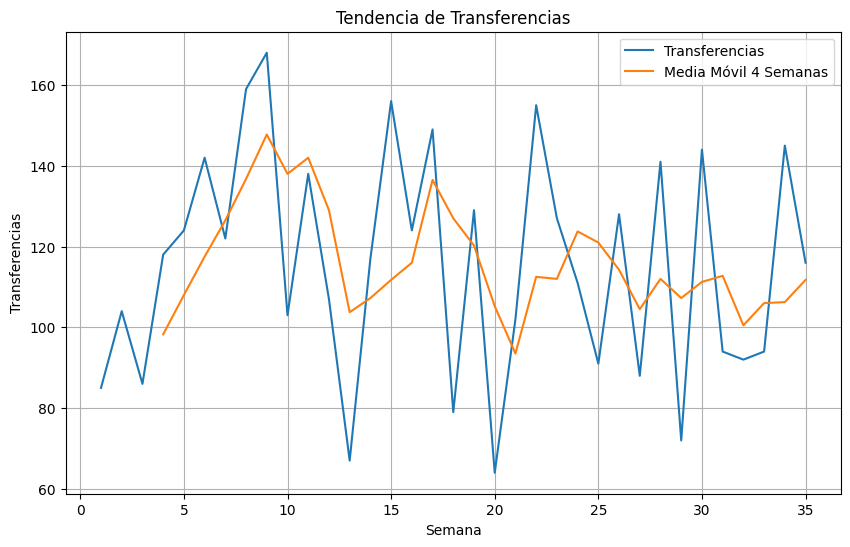

In [52]:
# @title
df_agrupado['media_movil_4_semanas'] = df_agrupado['transferencias'].rolling(window=4).mean()
print(df_agrupado[['transferencias', 'media_movil_4_semanas']])

# Gráfico de la tendencia
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['transferencias'], label='Transferencias')
plt.plot(df_agrupado.index, df_agrupado['media_movil_4_semanas'], label='Media Móvil 4 Semanas')
plt.title('Tendencia de Transferencias')
plt.xlabel('Semana')
plt.ylabel('Transferencias')
plt.legend()
plt.grid(True)
plt.show()